In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf

In [5]:
df = pd.read_csv("Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
df.shape

(1258, 6)

In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


# Select Only "open" Columns

In [8]:
training_set = df.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Scaled

In [9]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Data Structure of Time Series

In [10]:
x_train = []
y_train = []

for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

# Create Array

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping [Add indicator]

In [12]:
x_train.shape

(1198, 60)

In [13]:
x_train.shape[0]

1198

In [14]:
x_train.shape[1]

60

In [15]:
# use one indicator here
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [16]:
x_train.shape

(1198, 60, 1)

# Building Time Series Model

In [17]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

Using TensorFlow backend.


In [18]:
model = Sequential()

# input 2 dimension(timestamp, indicator)
model.add(LSTM(units= 50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units= 50,return_sequences=True))
#model.add(Dropout(0.2))
model.add(LSTM(units= 50,return_sequences=True))

model.add(Flatten())
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss = "mse", optimizer = "adam", metrics= ["accuracy"])

In [20]:
model.fit(x_train, y_train,epochs =100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0341 - acc: 0.0017
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0038 - acc: 0.0017
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0034 - acc: 0.0017
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0031 - acc: 0.0017
Epoch 5/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0030 - acc: 0.0017
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0026 - acc: 0.0017
Epoch 7/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0026 - acc: 0.0017
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0024 - acc: 0.0017
Epoch 9/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0021 - acc: 0.0017
Epoch 10/100
1198/1198 [==============================] -

1198/1198 [==============================] - 11s 9ms/step - loss: 3.4125e-04 - acc: 0.0017
Epoch 79/100
1198/1198 [==============================] - 11s 9ms/step - loss: 3.2561e-04 - acc: 0.0017
Epoch 80/100
1198/1198 [==============================] - 11s 9ms/step - loss: 3.3523e-04 - acc: 0.0017
Epoch 81/100
1198/1198 [==============================] - 11s 9ms/step - loss: 3.3732e-04 - acc: 0.0017
Epoch 82/100
1198/1198 [==============================] - 11s 9ms/step - loss: 3.0745e-04 - acc: 0.0017
Epoch 83/100
1198/1198 [==============================] - 11s 9ms/step - loss: 3.1724e-04 - acc: 0.0017
Epoch 84/100
1198/1198 [==============================] - 11s 9ms/step - loss: 3.2109e-04 - acc: 0.0017
Epoch 85/100
1198/1198 [==============================] - 11s 9ms/step - loss: 4.2465e-04 - acc: 0.0017
Epoch 86/100
1198/1198 [==============================] - 10s 9ms/step - loss: 3.2826e-04 - acc: 0.0017
Epoch 87/100
1198/1198 [==============================] - 10s 8ms/step - loss

# Prediction

In [30]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv("Recurrent_Neural_Networks/Google_Stock_Price_Test.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


### Select Column "Open"

In [49]:
real_stock_price = dataset_test.iloc[:, 1:2].values
len(real_stock_price)

20

## To predict 20 value,Add timestamp (60) with that value =80

In [50]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df['Open'], dataset_test['Open']), axis = 0)
len(dataset_total)

1278

In [51]:
len(dataset_total) - len(dataset_test) - 60

1198

In [52]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
len(inputs)

80

In [53]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
len(inputs)

80

In [54]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [55]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[783.4688 ],
       [781.1015 ],
       [788.4799 ],
       [791.77704],
       [799.29297],
       [805.6244 ],
       [807.9888 ],
       [799.90344],
       [804.24725],
       [811.7462 ],
       [805.79987],
       [803.5577 ],
       [804.69055],
       [798.92365],
       [808.06116],
       [819.8615 ],
       [827.9389 ],
       [835.0041 ],
       [825.89825],
       [805.6208 ]], dtype=float32)

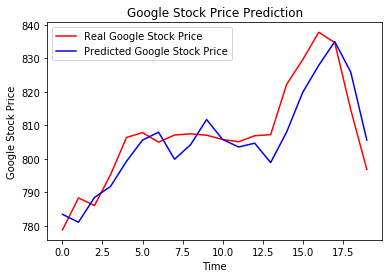

In [56]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

# The End